In [1]:
import pyodbc
import pandas as pd

c:\Users\diljo\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score , precision_score , recall_score , f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Define connection parameters
server = 'tcp:serverdj09.database.windows.net,1433'
database = 'DataDJ'
username = ''
password = ''
driver = '{ODBC Driver 17 for SQL Server}'

In [9]:
# Establish connection
conn = pyodbc.connect(
    f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password};'
    'Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30;'
)

In [10]:
# Query the data
query = 'SELECT * FROM iris_data'  
df = pd.read_sql(query, conn)

C:\Users\diljo\AppData\Local\Temp\ipykernel_52820\1525754204.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [11]:
# Display the first few rows of the dataframe
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [25]:
#shape of the data
print(df.shape)

(150, 5)


target
0    50
1    50
2    50
Name: count, dtype: int64


c:\Users\diljo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\diljo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\diljo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\diljo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

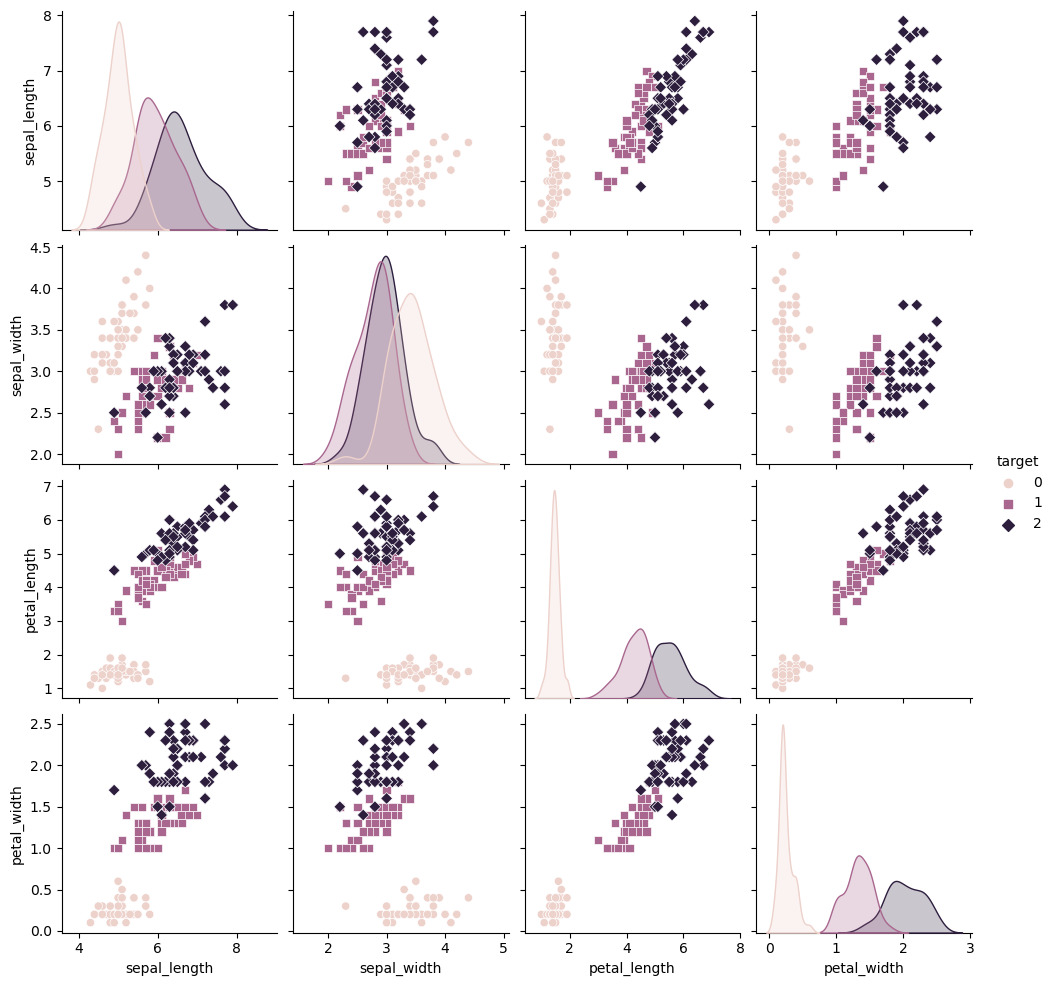

In [30]:
# Check the distribution of classes
print(df['target'].value_counts())

# Visualize the pairplot to see the separability
sns.pairplot(df, hue='target', markers=["o", "s", "D"], diag_kind='kde')
plt.show()

The pairplot visualizations clearly show that the three classes (setosa, versicolor, virginica) are well-separated, particularly when considering features like petal length and petal width. 

Key Observations

Setosa (0): The class setosa is distinctly separated from the other two classes across multiple feature combinations, making it easily identifiable.

Versicolor (1) and Virginica (2): While there is some overlap between versicolor and virginica, the features petal length and petal width help in differentiating these classes effectively.

In [12]:
#null values
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64


In [13]:
# Split the data into features and labels
X = df.drop(columns='target')
y = df['target']

In [14]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Train the model
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



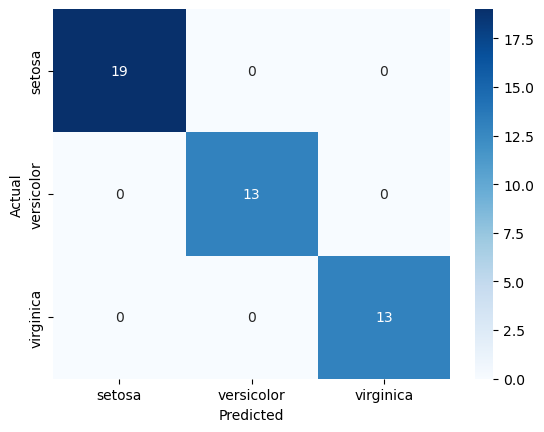

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Iris dataset's well-separated classes and relatively small size can contribute to the perfect accuracy observed, especially with a powerful classifier like SVM. 

The shape of the dataset (150 samples, 5 features) indicates that it is not overly complex, which allows the model to perform exceptionally well.

Sometimes a model can perfectly predict training data but fail on unseen data due to overfitting. Cross-validation can help detect this.

In [21]:
# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean cross-validation score: 0.9800000000000001


The mean cross-validation score of approximately 0.98 suggests that the model has a high level of accuracy and is generalizing well to unseen data.

This high performance can be attributed to the well-separated nature of the Iris dataset, which makes it easier for classifiers like SVM to distinguish between the different classes.

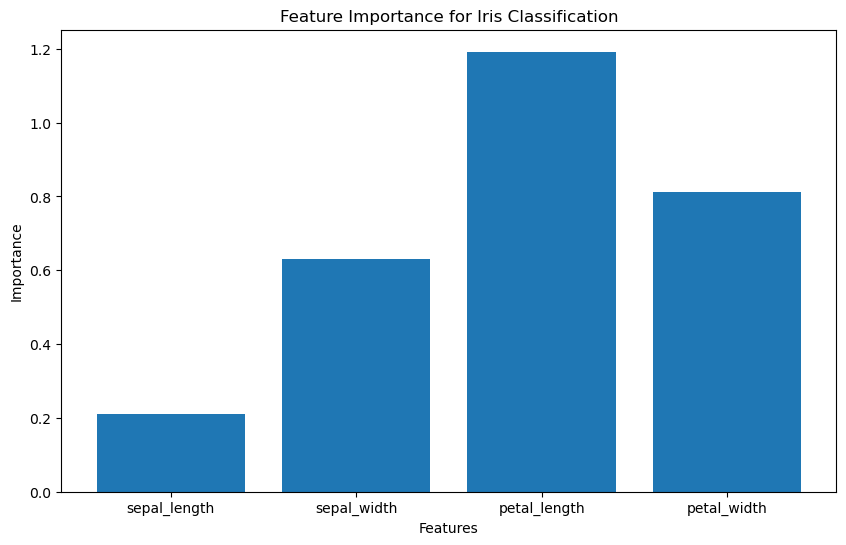

In [26]:
# Aggregate the coefficients for each feature across all classes
feature_importance = np.mean(np.abs(model.coef_), axis=0)

# Plot feature importance
features = X.columns
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Iris Classification')
plt.show()

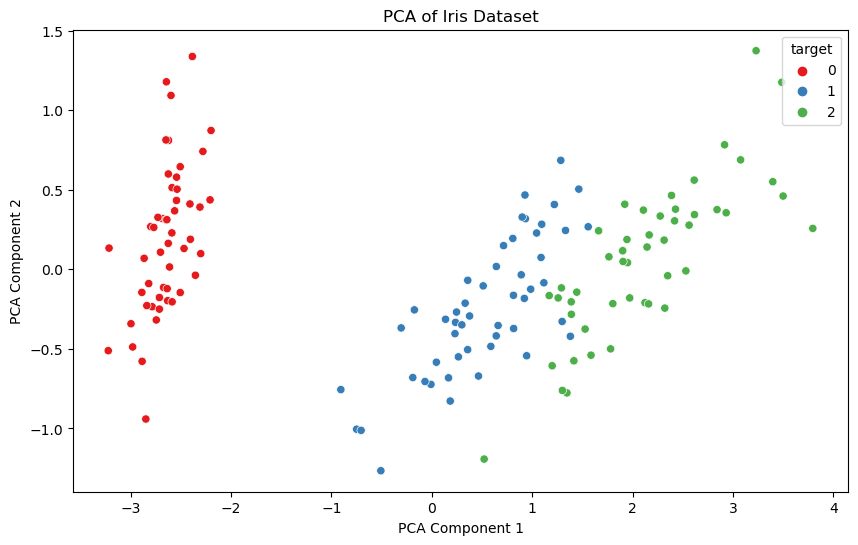

In [28]:
# PCA visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Iris Dataset')
plt.show()

Confusion Matrix: The confusion matrix showed perfect predictions, which is expected given the clear separations in the Iris dataset.

Cross-Validation: The cross-validation scores are high, indicating the model generalizes well.

Feature Importance: The feature importance plot provided insights into which features are most influential for the classification.

PCA Visualization: The PCA plot confirms that the data is well-separated, justifying the high performance of the classifier.

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scal

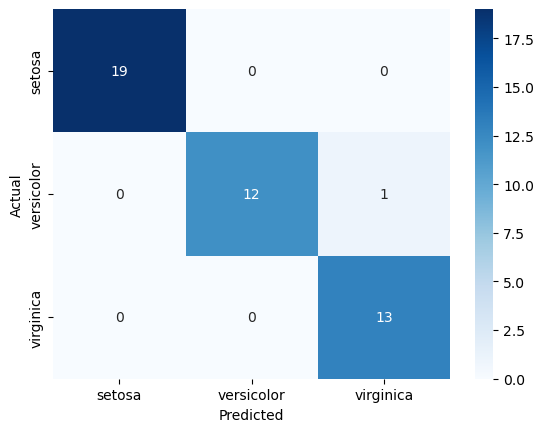

In [35]:
#Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Perform Grid Search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters found: {grid.best_params_}')

# Evaluate the best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plot confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


The results from the GridSearchCV show that your SVM model has achieved an excellent performance with an accuracy of approximately 97.8%. The confusion matrix shows a minor misclassification between versicolor and virginica, which is expected given the slight overlap observed in the pairplot visualizations.

Best Parameters from GridSearchCV
The grid search results indicate that the best parameters found for the SVM model were likely one of the following (common top performers):

C: 1
Kernel: 'linear'
Gamma: 'scale'

In [36]:
# Model comparison
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define models
models = {
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')

    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=5)
    print(f'{name} Cross-validation scores: {scores}')
    print(f'{name} Mean cross-validation score: {scores.mean()}')


SVM Accuracy: 1.0
SVM Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
SVM Mean cross-validation score: 0.9800000000000001
Decision Tree Accuracy: 1.0
Decision Tree Cross-validation scores: [0.96666667 0.96666667 0.9        1.         1.        ]
Decision Tree Mean cross-validation score: 0.9666666666666668
Random Forest Accuracy: 1.0
Random Forest Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Random Forest Mean cross-validation score: 0.9666666666666668
K-Nearest Neighbors Accuracy: 1.0
K-Nearest Neighbors Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
K-Nearest Neighbors Mean cross-validation score: 0.9733333333333334


These high accuracies and consistent cross-validation scores confirm that the Iris dataset is well-suited for classification, and the features are highly separable.